In [1]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best) 
# jpg is better for images
IPython.core.display.set_matplotlib_formats("jpg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
import scipy
import scipy.io
import numpy as np
from spectral import *

# Read the data

In [2]:
r1_reg = scipy.io.loadmat('r1_reg.mat')
r1_reg = r1_reg['r1_reg']

pca_red = scipy.io.loadmat('pca_red.mat')
pca_red = pca_red['pca_red']

mnf_red = scipy.io.loadmat('mnf_red.mat')
mnf_red = mnf_red['mnf_red']

ica_red = scipy.io.loadmat('ica_red.mat')
ica_red = ica_red['ica_red']

rp_red = scipy.io.loadmat('rp_red.mat')
rp_red = rp_red['rp_red']

rsvd_red = scipy.io.loadmat('rsvd_red.mat')
rsvd_red = rsvd_red['rsvd_red']

agci_red = scipy.io.loadmat('agci_red.mat')
agci_red = agci_red['agci_red']

In [3]:
img = np.zeros((500,500,3))
img[:,:,0] = r1_reg[:,:,53]
img[:,:,1] = r1_reg[:,:,35]
img[:,:,2] = r1_reg[:,:,17]

def showcsegm(segm, img):
    "show a computed label"
    
    # fill it with colors from the image
    csegm = colorsegms(segm, img)
    c1 = np.unique(csegm[:,:,0])
    c2 = np.unique(csegm[:,:,1])
    c3 = np.unique(csegm[:,:,2])
    csegm[:,:,0] = (csegm[:,:,0]-0.5*c1[0])/c1[6]
    csegm[:,:,1] = (csegm[:,:,1]-0.5*c2[0])/c2[6]
    csegm[:,:,2] = (csegm[:,:,2]-c3[0])/(c3[6]--c3[0])
    
    plt.figure(figsize=(15,15))
    plt.imshow(csegm, interpolation='nearest')
    plt.title('Original+Kmeans', fontsize = '10')
    plt.colorbar()
    
    return csegm

def colorsegms(segm, img):
    """
    colorsegm - color a segmentation based on the image
    csegm = colorsegm(segm, img)
    segm = the segmentation image  [type = np.ndarray]
    img = the original image    [type = np.ndarray (or Image)]
    csegm = the colored segmentation -- each segment is colored based on the 
            average pixel color within the segment.
    """
    img = asarray(img).copy()
    if segm.shape[0:2] != img.shape[0:2]:
        raise Exception('The shape of segmentation and image are not consistent') 
    rimg, gimg, bimg = img[:,:,0], img[:,:,1], img[:,:,2]
    for i in range(0, int(max(segm.flatten())) + 1):
        # assume label starts from 1
        ind = (segm == i)
        rimg[ind] = mean(rimg[ind].flatten())
        gimg[ind] = mean(gimg[ind].flatten())
        bimg[ind] = mean(bimg[ind].flatten())
    # handle outliers from DBSCAN
    ind = (segm == -1)
    rimg[ind] = 0
    gimg[ind] = 0
    bimg[ind] = 0
    return img

# Perform k-means

In [4]:
# On original dataset
r1_reg = reshape(r1_reg, [250000,372])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(r1_reg)
Y = kmeans.predict(r1_reg)
label_ori = reshape(Y,[500,500])
r1_reg = reshape(r1_reg, [500,500,372])

In [13]:
def showsegm(segm, img):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["darkorange","lightgreen","burlywood","forestgreen",
                                                                 "darkolivegreen","wheat","darkgoldenrod"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('Original+Kmeans', fontsize = '30')
    #plt.colorbar()
    return segm

array([[4, 5, 5, ..., 2, 6, 6],
       [1, 1, 5, ..., 2, 2, 6],
       [4, 6, 6, ..., 2, 2, 6],
       ...,
       [1, 1, 6, ..., 6, 6, 6],
       [1, 1, 6, ..., 3, 3, 4],
       [1, 4, 6, ..., 2, 3, 2]], dtype=int32)

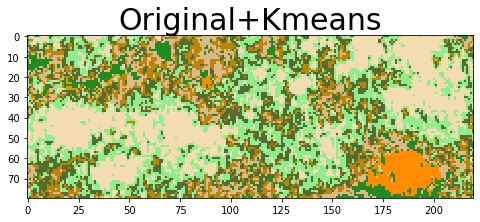

In [14]:
showsegm(label_ori[100:180,180:400], img)
# csegm = showcsegm(label_ori, img)

In [8]:
# On PCA reduced dataset
pca_red = reshape(pca_red, [250000,24])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(pca_red)
Y = kmeans.predict(pca_red)
label_pca = reshape(Y,[500,500])

In [9]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["darkolivegreen","darkgoldenrod","forestgreen","wheat",
                                                                 "lightgreen","burlywood","darkorange"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('PCA+Kmeans', fontsize = '30')
    # plt.colorbar()
    return segm

array([[1, 3, 3, ..., 0, 4, 4],
       [6, 6, 3, ..., 0, 0, 4],
       [1, 4, 4, ..., 0, 0, 4],
       ...,
       [6, 6, 4, ..., 4, 4, 4],
       [6, 6, 4, ..., 5, 5, 1],
       [6, 1, 4, ..., 0, 5, 0]], dtype=int32)

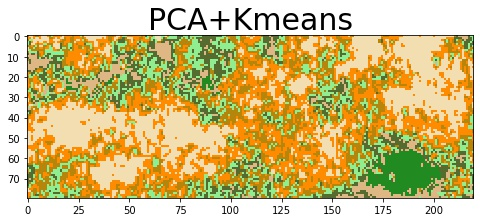

In [11]:
showsegm(label_pca[100:180,180:400])

In [91]:
# On MNF reduced data
mnf_red = reshape(mnf_red, [250000,83])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(mnf_red)
Y = kmeans.predict(mnf_red)
label_mnf = reshape(Y,[500,500])

In [209]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["forestgreen","darkgoldenrod","lightgreen","wheat",
                                                                 "darkolivegreen","burlywood","darkorange"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('MNF+Kmeans', fontsize = '30')
    #plt.colorbar()
    return segm

array([[1, 6, 6, ..., 1, 2, 5],
       [6, 6, 6, ..., 1, 2, 2],
       [6, 6, 6, ..., 1, 1, 5],
       ...,
       [6, 6, 6, ..., 1, 1, 1],
       [6, 6, 6, ..., 1, 1, 1],
       [6, 6, 6, ..., 1, 1, 1]], dtype=int32)

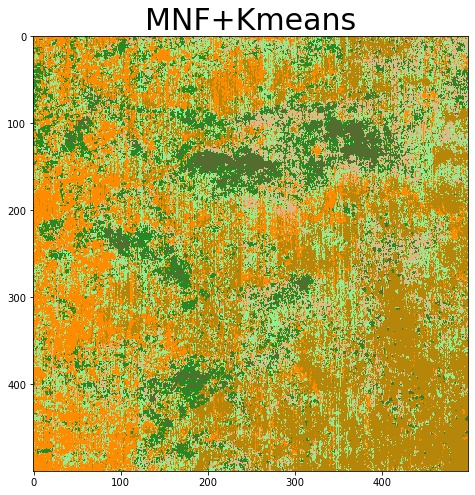

In [210]:
showsegm(label_mnf)

In [98]:
# On ICA reduced data
ica_red = reshape(ica_red, [250000,30])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(ica_red)
Y = kmeans.predict(ica_red)
label_ica = reshape(Y,[500,500])

In [213]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["wheat","darkgoldenrod","darkorange","lightgreen",
                                                                 "forestgreen","burlywood","darkolivegreen"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('ICA+Kmeans', fontsize = '30')
    #plt.colorbar()
    return segm

array([[3, 2, 2, ..., 1, 1, 4],
       [1, 3, 2, ..., 1, 1, 1],
       [1, 2, 2, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5]], dtype=int32)

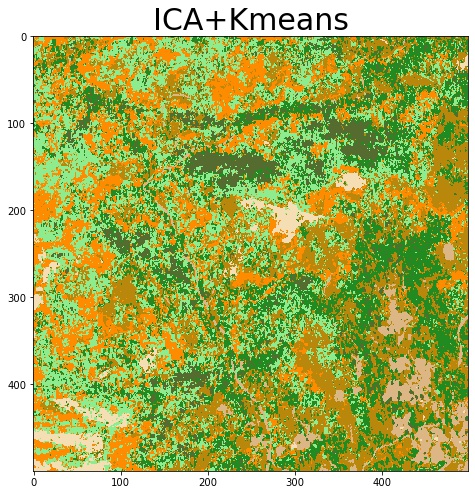

In [214]:
showsegm(label_ica)

In [119]:
# On rSVD reduced data
rsvd_red = reshape(rsvd_red, [250000,12])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(rsvd_red)
Y = kmeans.predict(rsvd_red)
label_rsvd = reshape(Y,[500,500])

In [217]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["darkolivegreen","burlywood","forestgreen","darkgoldenrod",
                                                                 "wheat","lightgreen","darkorange"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('rSVD PCA+Kmeans', fontsize = '30')
    # plt.colorbar()
    return segm

array([[3, 6, 6, ..., 3, 3, 1],
       [6, 6, 6, ..., 1, 3, 1],
       [6, 6, 3, ..., 1, 3, 1],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=int32)

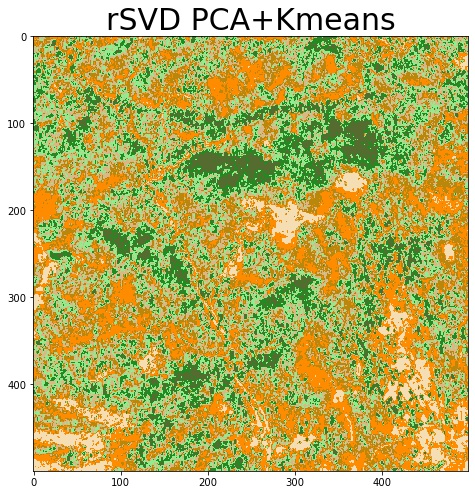

In [218]:
showsegm(label_rsvd)

In [145]:
# On RP reduced data
rp_red = reshape(rp_red, [250000,30])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(rp_red)
Y = kmeans.predict(rp_red)
label_rp = reshape(Y,[500,500])

In [221]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["forestgreen","burlywood","darkgoldenrod","wheat",
                                                                 "lightgreen","darkorange","darkolivegreen"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('RP+Kmeans', fontsize = '30')
    #plt.colorbar()
    return segm

array([[5, 5, 5, ..., 5, 0, 0],
       [5, 5, 5, ..., 1, 0, 0],
       [5, 5, 5, ..., 1, 5, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int32)

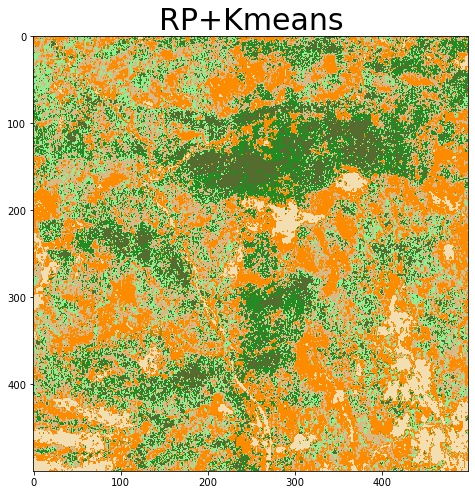

In [222]:
showsegm(label_rp)

In [176]:
# On AGC-I reduced data
agci_red = reshape(agci_red, [250000,7])
kmeans = cluster.KMeans(n_clusters=7)
kmeans.fit(agci_red)
Y = kmeans.predict(agci_red)
label_agci = reshape(Y,[500,500])

In [225]:
def showsegm(segm):
    "show a computed label"
    
    clmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
                                                                ["forestgreen","darkorange","lightgreen","burlywood",
                                                                 "darkolivegreen","wheat","darkgoldenrod"])

    
    plt.figure(figsize=(8,8))
    plt.imshow(segm, interpolation='nearest', cmap = clmap)
    plt.title('AGC-I+Kmeans', fontsize = '30')
    #plt.colorbar()
    return segm

array([[6, 6, 6, ..., 3, 3, 2],
       [6, 6, 1, ..., 3, 3, 3],
       [6, 6, 6, ..., 3, 3, 2],
       ...,
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5]], dtype=int32)

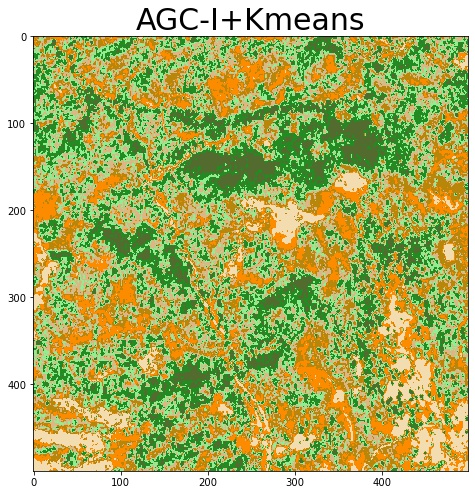

In [226]:
showsegm(label_agci)